In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


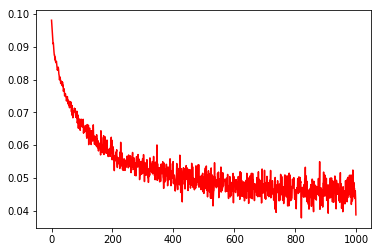

0.8399


In [30]:
import matplotlib.pyplot as plt
# 定义回归模型
x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32,[None,10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# 预测值
y = tf.matmul(x,W) + b
# 定义损失函数和优化器,采用交叉熵
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=y_))
# 采用最小平方差
loss = tf.reduce_mean(tf.square(y-y_))
# 采用随机梯度SGD
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
xx=[]
# train
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(1000):
        batch_xs,batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        xx.append(sess.run(loss,feed_dict={x: batch_xs, y_: batch_ys}))
    plt.plot(range(1000),xx,'r')
    plt.show()
# 评估模型
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
# 布尔型转化为浮点数，并取平均值，得到准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
